In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 #Database connection details
db_user = "postgres"
db_password = "30251421"  
db_host = "localhost"
db_port = "5432"
db_name = "telecom"
engine = create_engine(f"postgresql+pg8000://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

In [3]:
query = "SELECT * FROM public.xdr_data;"
data = pd.read_sql(query, engine)

In [5]:
def aggregate_customer_data(data):
    data['TCP DL Retrans. Vol (Bytes)'] = data['TCP DL Retrans. Vol (Bytes)'].replace(np.nan, data['TCP DL Retrans. Vol (Bytes)'].mean())
    data['Avg RTT DL (ms)'] = data['Avg RTT DL (ms)'].replace(np.nan, data['Avg RTT DL (ms)'].mean())
    data['Avg Bearer TP DL (kbps)'] = data['Avg Bearer TP DL (kbps)'].replace(np.nan, data['Avg Bearer TP DL (kbps)'].mean())
    
    aggregated_data = data.groupby('MSISDN/Number').agg({
        'TCP DL Retrans. Vol (Bytes)': 'mean',
        'Avg RTT DL (ms)': 'mean',
        'Handset Type': 'first',
        'Avg Bearer TP DL (kbps)': 'mean'
    }).reset_index()

    return aggregated_data

aggregated_data = aggregate_customer_data(data)
print(aggregated_data)

        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  Avg RTT DL (ms)  \
0        3.360100e+10                 2.080991e+07        46.000000   
1        3.360100e+10                 2.080991e+07        30.000000   
2        3.360100e+10                 2.080991e+07       109.795706   
3        3.360101e+10                 1.066000e+03        69.000000   
4        3.360101e+10                 1.507977e+07        57.000000   
...               ...                          ...              ...   
106851   3.379000e+10                 2.150440e+05        42.000000   
106852   3.379000e+10                 2.080991e+07        34.000000   
106853   3.197021e+12                 2.080991e+07       109.795706   
106854   3.370000e+14                 2.080991e+07       109.795706   
106855   8.823971e+14                 2.080991e+07       109.795706   

                            Handset Type  Avg Bearer TP DL (kbps)  
0         Huawei P20 Lite Huawei Nova 3E                     37.0  
1          

In [7]:
def compute_top_bottom_frequent(data):
    top_tcp = data['TCP DL Retrans. Vol (Bytes)'].nlargest(10)
    bottom_tcp = data['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
    most_frequent_tcp = data['TCP DL Retrans. Vol (Bytes)'].mode()

    top_rtt = data['Avg RTT DL (ms)'].nlargest(10)
    bottom_rtt = data['Avg RTT DL (ms)'].nsmallest(10)
    most_frequent_rtt = data['Avg RTT DL (ms)'].mode()

    top_throughput = data['Avg Bearer TP DL (kbps)'].nlargest(10)
    bottom_throughput = data['Avg Bearer TP DL (kbps)'].nsmallest(10)
    most_frequent_throughput = data['Avg Bearer TP DL (kbps)'].mode()

    return {
        'top_tcp': top_tcp,
        'bottom_tcp': bottom_tcp,
        'most_frequent_tcp': most_frequent_tcp,
        'top_rtt': top_rtt,
        'bottom_rtt': bottom_rtt,
        'most_frequent_rtt': most_frequent_rtt,
        'top_throughput': top_throughput,
        'bottom_throughput': bottom_throughput,
        'most_frequent_throughput': most_frequent_throughput
    }

top_bottom_frequent = compute_top_bottom_frequent(aggregated_data)
print(top_bottom_frequent)

{'top_tcp': 85785    4.289488e+09
32273    4.288060e+09
58026    4.268432e+09
31942    4.254644e+09
62049    4.211189e+09
70079    4.166591e+09
43629    4.131046e+09
48341    4.117753e+09
64113    3.968072e+09
98211    3.785295e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64, 'bottom_tcp': 56622     2.0
95322     2.0
71705     4.0
71778     4.0
87156     4.0
87348     4.0
95213     4.0
95331     4.0
95774     4.0
100616    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64, 'most_frequent_tcp': 0    2.080991e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64, 'top_rtt': 47983     96923.0
80249     54847.0
41944     32333.0
93844     26971.0
1713      26250.0
74240     25602.0
104325    25374.0
105752    24733.0
85683     22961.5
15409     20979.0
Name: Avg RTT DL (ms), dtype: float64, 'bottom_rtt': 28878     0.0
40873     0.0
44748     0.0
66098     0.0
88903     0.0
98541     0.0
39066     2.0
83396     4.0
36039     5.0
106569    5.0
Name: Avg RTT DL (ms), dtype: float64,

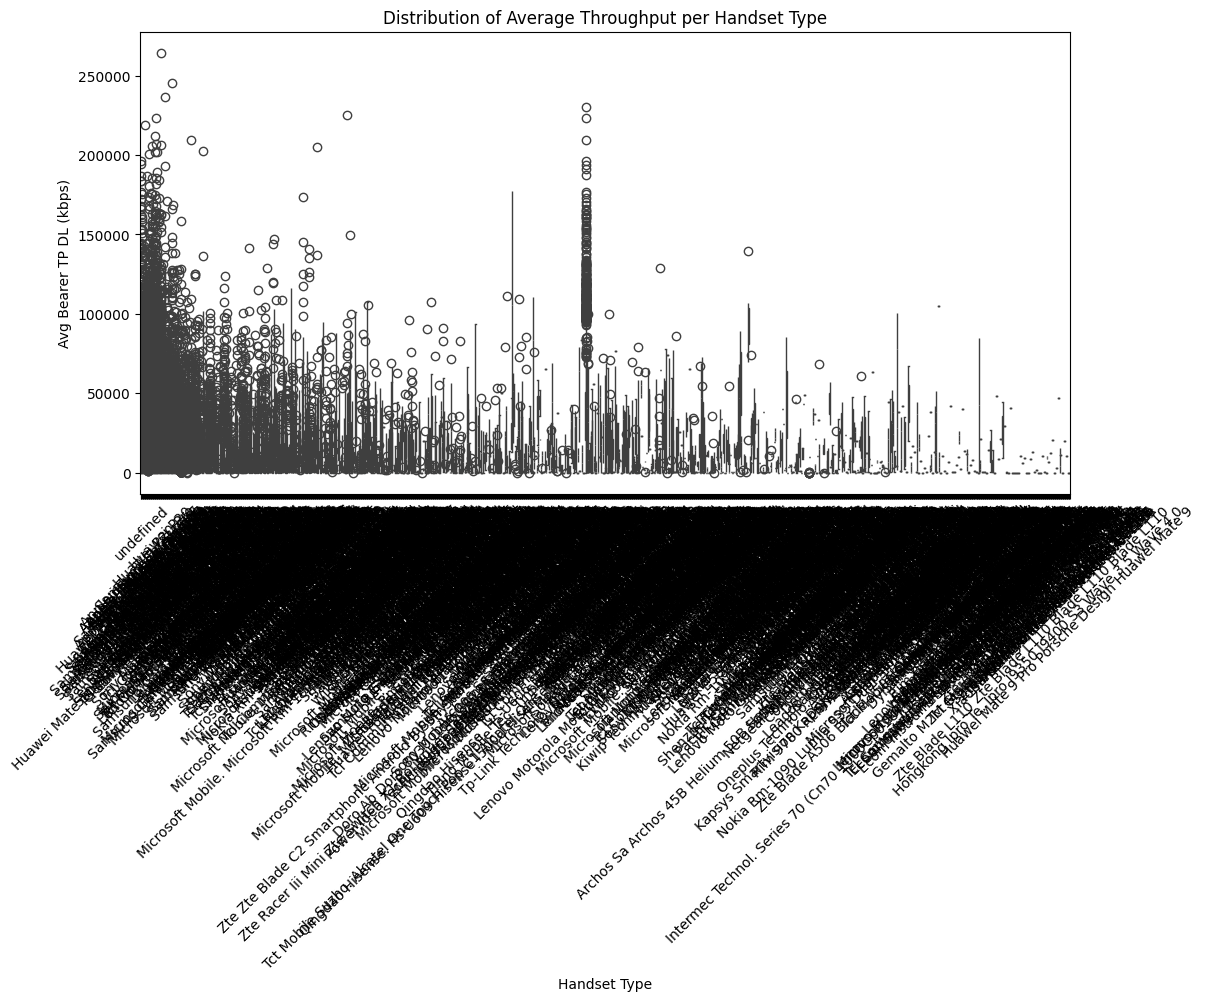

In [8]:
def plot_throughput_distribution(data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Handset Type', y='Avg Bearer TP DL (kbps)', data=data)
    plt.title('Distribution of Average Throughput per Handset Type')
    plt.xticks(rotation=45)
    plt.show()

plot_throughput_distribution(aggregated_data)